In [0]:
import pandas as pd
import csv
import requests
from contextlib import closing

In [0]:
import datetime
import dateutil
from datetime import datetime, timedelta, time, date

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
!ls

drive  sample_data


# Strap Taxi Data - TLC

In [0]:
url = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2019-01.csv"

In [0]:
#taxi zone 230 = Times Sq/Theatre District
#taxi zone 148 = Lower East Side
#taxi zone 37 = Bushwick South
#taxi zone 255 = Williamsburg (North Side)
#taxi zone 36 = Bushwick North
#taxi zone 79 = East Village

In [0]:
taxizone_230_fhv_inflow_1901 = {}
taxizone_230_fhv_outflow_1901 = {}
taxizone_230_fhv_loop_1901 = {}

taxizone_148_fhv_inflow_1901 = {}
taxizone_148_fhv_outflow_1901 = {}
taxizone_148_fhv_loop_1901 = {}

taxizone_37_fhv_inflow_1901 = {}
taxizone_37_fhv_outflow_1901 = {}
taxizone_37_fhv_loop_1901 = {}

taxizone_255_fhv_inflow_1901 = {}
taxizone_255_fhv_outflow_1901 = {}
taxizone_255_fhv_loop_1901 = {}

taxizone_36_fhv_inflow_1901 = {}
taxizone_36_fhv_outflow_1901 = {}
taxizone_36_fhv_loop_1901 = {}

taxizone_79_fhv_inflow_1901 = {}
taxizone_79_fhv_outflow_1901 = {}
taxizone_79_fhv_loop_1901 = {}

with closing(requests.get(url, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    reader = csv.DictReader(f)
    for record in reader:
        date_hour_do = record['dropoff_datetime'][:13]
        date_hour_pu = record['pickup_datetime'][:13]
        if record['DOLocationID'] == '230' and record['PULocationID'] != '230':
            taxizone_230_fhv_inflow_1901[date_hour_do]=taxizone_230_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_outflow_1901[date_hour_pu]=taxizone_230_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_loop_1901[date_hour_do]=taxizone_230_fhv_loop_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] != '148':
            taxizone_148_fhv_inflow_1901[date_hour_do]=taxizone_148_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_outflow_1901[date_hour_pu]=taxizone_148_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_loop_1901[date_hour_do]=taxizone_148_fhv_loop_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] != '37':
            taxizone_37_fhv_inflow_1901[date_hour_do]=taxizone_37_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_outflow_1901[date_hour_pu]=taxizone_37_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_loop_1901[date_hour_do]=taxizone_37_fhv_loop_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] != '255':
            taxizone_255_fhv_inflow_1901[date_hour_do]=taxizone_255_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_outflow_1901[date_hour_pu]=taxizone_255_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_loop_1901[date_hour_do]=taxizone_255_fhv_loop_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] != '36':
            taxizone_36_fhv_inflow_1901[date_hour_do]=taxizone_36_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_outflow_1901[date_hour_pu]=taxizone_36_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_loop_1901[date_hour_do]=taxizone_36_fhv_loop_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] != '79':
            taxizone_79_fhv_inflow_1901[date_hour_do]=taxizone_79_fhv_inflow_1901.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_outflow_1901[date_hour_pu]=taxizone_79_fhv_outflow_1901.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_loop_1901[date_hour_do]=taxizone_79_fhv_loop_1901.get(date_hour_do,0)+1

In [0]:
url2 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2019-02.csv"
url3 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2019-02.csv"

In [0]:
taxizone_230_fhv_inflow_1902 = {}
taxizone_230_fhv_outflow_1902 = {}
taxizone_230_fhv_loop_1902 = {}

taxizone_148_fhv_inflow_1902 = {}
taxizone_148_fhv_outflow_1902 = {}
taxizone_148_fhv_loop_1902 = {}

taxizone_37_fhv_inflow_1902 = {}
taxizone_37_fhv_outflow_1902 = {}
taxizone_37_fhv_loop_1902 = {}

taxizone_255_fhv_inflow_1902 = {}
taxizone_255_fhv_outflow_1902 = {}
taxizone_255_fhv_loop_1902 = {}

taxizone_36_fhv_inflow_1902 = {}
taxizone_36_fhv_outflow_1902 = {}
taxizone_36_fhv_loop_1902 = {}

taxizone_79_fhv_inflow_1902 = {}
taxizone_79_fhv_outflow_1902 = {}
taxizone_79_fhv_loop_1902 = {}

with closing(requests.get(url2, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    reader = csv.DictReader(f)
    for record in reader:
        date_hour_do = record['dropoff_datetime'][:13]
        date_hour_pu = record['pickup_datetime'][:13]
        if record['DOLocationID'] == '230' and record['PULocationID'] != '230':
            taxizone_230_fhv_inflow_1902[date_hour_do]=taxizone_230_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_outflow_1902[date_hour_pu]=taxizone_230_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_loop_1902[date_hour_do]=taxizone_230_fhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] != '148':
            taxizone_148_fhv_inflow_1902[date_hour_do]=taxizone_148_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_outflow_1902[date_hour_pu]=taxizone_148_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_loop_1902[date_hour_do]=taxizone_148_fhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] != '37':
            taxizone_37_fhv_inflow_1902[date_hour_do]=taxizone_37_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_outflow_1902[date_hour_pu]=taxizone_37_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_loop_1902[date_hour_do]=taxizone_37_fhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] != '255':
            taxizone_255_fhv_inflow_1902[date_hour_do]=taxizone_255_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_outflow_1902[date_hour_pu]=taxizone_255_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_loop_1902[date_hour_do]=taxizone_255_fhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] != '36':
            taxizone_36_fhv_inflow_1902[date_hour_do]=taxizone_36_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_outflow_1902[date_hour_pu]=taxizone_36_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_loop_1902[date_hour_do]=taxizone_36_fhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] != '79':
            taxizone_79_fhv_inflow_1902[date_hour_do]=taxizone_79_fhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_outflow_1902[date_hour_pu]=taxizone_79_fhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_loop_1902[date_hour_do]=taxizone_79_fhv_loop_1902.get(date_hour_do,0)+1

In [0]:
taxizone_230_hfhv_inflow_1902 = {}
taxizone_230_hfhv_outflow_1902 = {}
taxizone_230_hfhv_loop_1902 = {}

taxizone_148_hfhv_inflow_1902 = {}
taxizone_148_hfhv_outflow_1902 = {}
taxizone_148_hfhv_loop_1902 = {}

taxizone_37_hfhv_inflow_1902 = {}
taxizone_37_hfhv_outflow_1902 = {}
taxizone_37_hfhv_loop_1902 = {}

taxizone_255_hfhv_inflow_1902 = {}
taxizone_255_hfhv_outflow_1902 = {}
taxizone_255_hfhv_loop_1902 = {}

taxizone_36_hfhv_inflow_1902 = {}
taxizone_36_hfhv_outflow_1902 = {}
taxizone_36_hfhv_loop_1902 = {}

taxizone_79_hfhv_inflow_1902 = {}
taxizone_79_hfhv_outflow_1902 = {}
taxizone_79_hfhv_loop_1902 = {}

with closing(requests.get(url3, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    reader = csv.DictReader(f)
    for record in reader:
        date_hour_do = record['dropoff_datetime'][:13]
        date_hour_pu = record['pickup_datetime'][:13]
        if record['DOLocationID'] == '230' and record['PULocationID'] != '230':
            taxizone_230_hfhv_inflow_1902[date_hour_do]=taxizone_230_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '230' and record['PULocationID'] == '230':
            taxizone_230_hfhv_outflow_1902[date_hour_pu]=taxizone_230_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '230' and record['PULocationID'] == '230':
            taxizone_230_hfhv_loop_1902[date_hour_do]=taxizone_230_hfhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] != '148':
            taxizone_148_hfhv_inflow_1902[date_hour_do]=taxizone_148_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '148' and record['PULocationID'] == '148':
            taxizone_148_hfhv_outflow_1902[date_hour_pu]=taxizone_148_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] == '148':
            taxizone_148_hfhv_loop_1902[date_hour_do]=taxizone_148_hfhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] != '37':
            taxizone_37_hfhv_inflow_1902[date_hour_do]=taxizone_37_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '37' and record['PULocationID'] == '37':
            taxizone_37_hfhv_outflow_1902[date_hour_pu]=taxizone_37_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] == '37':
            taxizone_37_hfhv_loop_1902[date_hour_do]=taxizone_37_hfhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] != '255':
            taxizone_255_hfhv_inflow_1902[date_hour_do]=taxizone_255_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '255' and record['PULocationID'] == '255':
            taxizone_255_hfhv_outflow_1902[date_hour_pu]=taxizone_255_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] == '255':
            taxizone_255_hfhv_loop_1902[date_hour_do]=taxizone_255_hfhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] != '36':
            taxizone_36_hfhv_inflow_1902[date_hour_do]=taxizone_36_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '36' and record['PULocationID'] == '36':
            taxizone_36_hfhv_outflow_1902[date_hour_pu]=taxizone_36_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] == '36':
            taxizone_36_hfhv_loop_1902[date_hour_do]=taxizone_36_hfhv_loop_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] != '79':
            taxizone_79_hfhv_inflow_1902[date_hour_do]=taxizone_79_hfhv_inflow_1902.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '79' and record['PULocationID'] == '79':
            taxizone_79_hfhv_outflow_1902[date_hour_pu]=taxizone_79_hfhv_outflow_1902.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] == '79':
            taxizone_79_hfhv_loop_1902[date_hour_do]=taxizone_79_hfhv_loop_1902.get(date_hour_do,0)+1

In [0]:
url4 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2019-03.csv"
url5 = "https://nyc-tlc.s3.amazonaws.com/trip+data/fhvhv_tripdata_2019-03.csv"

In [0]:
taxizone_230_fhv_inflow_1903 = {}
taxizone_230_fhv_outflow_1903 = {}
taxizone_230_fhv_loop_1903 = {}

taxizone_148_fhv_inflow_1903 = {}
taxizone_148_fhv_outflow_1903 = {}
taxizone_148_fhv_loop_1903 = {}

taxizone_37_fhv_inflow_1903 = {}
taxizone_37_fhv_outflow_1903 = {}
taxizone_37_fhv_loop_1903 = {}

taxizone_255_fhv_inflow_1903 = {}
taxizone_255_fhv_outflow_1903 = {}
taxizone_255_fhv_loop_1903 = {}

taxizone_36_fhv_inflow_1903 = {}
taxizone_36_fhv_outflow_1903 = {}
taxizone_36_fhv_loop_1903 = {}

taxizone_79_fhv_inflow_1903 = {}
taxizone_79_fhv_outflow_1903 = {}
taxizone_79_fhv_loop_1903 = {}

with closing(requests.get(url4, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    reader = csv.DictReader(f)
    for record in reader:
        date_hour_do = record['dropoff_datetime'][:13]
        date_hour_pu = record['pickup_datetime'][:13]
        if record['DOLocationID'] == '230' and record['PULocationID'] != '230':
            taxizone_230_fhv_inflow_1903[date_hour_do]=taxizone_230_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_outflow_1903[date_hour_pu]=taxizone_230_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '230' and record['PULocationID'] == '230':
            taxizone_230_fhv_loop_1903[date_hour_do]=taxizone_230_fhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] != '148':
            taxizone_148_fhv_inflow_1903[date_hour_do]=taxizone_148_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_outflow_1903[date_hour_pu]=taxizone_148_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] == '148':
            taxizone_148_fhv_loop_1903[date_hour_do]=taxizone_148_fhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] != '37':
            taxizone_37_fhv_inflow_1903[date_hour_do]=taxizone_37_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_outflow_1903[date_hour_pu]=taxizone_37_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] == '37':
            taxizone_37_fhv_loop_1903[date_hour_do]=taxizone_37_fhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] != '255':
            taxizone_255_fhv_inflow_1903[date_hour_do]=taxizone_255_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_outflow_1903[date_hour_pu]=taxizone_255_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] == '255':
            taxizone_255_fhv_loop_1903[date_hour_do]=taxizone_255_fhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] != '36':
            taxizone_36_fhv_inflow_1903[date_hour_do]=taxizone_36_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_outflow_1903[date_hour_pu]=taxizone_36_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] == '36':
            taxizone_36_fhv_loop_1903[date_hour_do]=taxizone_36_fhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] != '79':
            taxizone_79_fhv_inflow_1903[date_hour_do]=taxizone_79_fhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_outflow_1903[date_hour_pu]=taxizone_79_fhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] == '79':
            taxizone_79_fhv_loop_1903[date_hour_do]=taxizone_79_fhv_loop_1903.get(date_hour_do,0)+1

In [0]:
taxizone_230_hfhv_inflow_1903 = {}
taxizone_230_hfhv_outflow_1903 = {}
taxizone_230_hfhv_loop_1903 = {}

taxizone_148_hfhv_inflow_1903 = {}
taxizone_148_hfhv_outflow_1903 = {}
taxizone_148_hfhv_loop_1903 = {}

taxizone_37_hfhv_inflow_1903 = {}
taxizone_37_hfhv_outflow_1903 = {}
taxizone_37_hfhv_loop_1903 = {}

taxizone_255_hfhv_inflow_1903 = {}
taxizone_255_hfhv_outflow_1903 = {}
taxizone_255_hfhv_loop_1903 = {}

taxizone_36_hfhv_inflow_1903 = {}
taxizone_36_hfhv_outflow_1903 = {}
taxizone_36_hfhv_loop_1903 = {}

taxizone_79_hfhv_inflow_1903 = {}
taxizone_79_hfhv_outflow_1903 = {}
taxizone_79_hfhv_loop_1903 = {}

with closing(requests.get(url5, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    reader = csv.DictReader(f)
    for record in reader:
        date_hour_do = record['dropoff_datetime'][:13]
        date_hour_pu = record['pickup_datetime'][:13]
        if record['DOLocationID'] == '230' and record['PULocationID'] != '230':
            taxizone_230_hfhv_inflow_1903[date_hour_do]=taxizone_230_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '230' and record['PULocationID'] == '230':
            taxizone_230_hfhv_outflow_1903[date_hour_pu]=taxizone_230_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '230' and record['PULocationID'] == '230':
            taxizone_230_hfhv_loop_1903[date_hour_do]=taxizone_230_hfhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] != '148':
            taxizone_148_hfhv_inflow_1903[date_hour_do]=taxizone_148_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '148' and record['PULocationID'] == '148':
            taxizone_148_hfhv_outflow_1903[date_hour_pu]=taxizone_148_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '148' and record['PULocationID'] == '148':
            taxizone_148_hfhv_loop_1903[date_hour_do]=taxizone_148_hfhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] != '37':
            taxizone_37_hfhv_inflow_1903[date_hour_do]=taxizone_37_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '37' and record['PULocationID'] == '37':
            taxizone_37_hfhv_outflow_1903[date_hour_pu]=taxizone_37_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '37' and record['PULocationID'] == '37':
            taxizone_37_hfhv_loop_1903[date_hour_do]=taxizone_37_hfhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] != '255':
            taxizone_255_hfhv_inflow_1903[date_hour_do]=taxizone_255_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '255' and record['PULocationID'] == '255':
            taxizone_255_hfhv_outflow_1903[date_hour_pu]=taxizone_255_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '255' and record['PULocationID'] == '255':
            taxizone_255_hfhv_loop_1903[date_hour_do]=taxizone_255_hfhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] != '36':
            taxizone_36_hfhv_inflow_1903[date_hour_do]=taxizone_36_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '36' and record['PULocationID'] == '36':
            taxizone_36_hfhv_outflow_1903[date_hour_pu]=taxizone_36_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '36' and record['PULocationID'] == '36':
            taxizone_36_hfhv_loop_1903[date_hour_do]=taxizone_36_hfhv_loop_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] != '79':
            taxizone_79_hfhv_inflow_1903[date_hour_do]=taxizone_79_hfhv_inflow_1903.get(date_hour_do,0)+1
        elif record['DOLocationID'] != '79' and record['PULocationID'] == '79':
            taxizone_79_hfhv_outflow_1903[date_hour_pu]=taxizone_79_hfhv_outflow_1903.get(date_hour_pu,0)+1
        elif record['DOLocationID'] == '79' and record['PULocationID'] == '79':
            taxizone_79_hfhv_loop_1903[date_hour_do]=taxizone_79_hfhv_loop_1903.get(date_hour_do,0)+1

# Process TLC data

In [0]:
import datetime

dt = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 4, 1, 1, 0, 0)
step = datetime.timedelta(hours=1)

result = []
fulldate = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H'))
    fulldate.append(dt.strftime('%m/%d/%Y %H:%M:%S'))
    dt += step

In [0]:
fhv = pd.DataFrame({'map' : result, 'time' : fulldate})

In [0]:
fhv['time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in fhv['time']]

In [0]:
fhv['hour'] = [x.hour for x in fhv['time']]
fhv['weekday'] = fhv[['time']].apply(lambda x: datetime.strftime(x['time'], '%A'), axis=1)
fhv['week'] = [x.isocalendar()[1] for x in fhv['time']]

In [0]:
def timebin(hour):
    if hour == 20:
        return 1
    if hour == 21:
        return 1
    if hour == 22:
        return 1
    if hour == 23:
        return 1
    if hour == 0:
        return 2
    if hour == 1:
        return 2
    if hour == 2:
        return 2
    if hour == 3:
        return 2
    else:
        return 0
    
hourgroups = {1:'8pm - 12am', 
              2: '12am - 4am', 
              0:'daytime'}

In [0]:
fhv['timegroup'] = fhv['hour'].apply(timebin)
fhv['timegroupstr'] = fhv['timegroup'].map(hourgroups)

In [0]:
fhv['date'] = [x[:10] for x in fhv['map']]

In [0]:
fhv['inflow_counts_1901'] = fhv.map.map(taxizone_230_fhv_inflow_1901)
fhv['outflow_counts_1901'] = fhv.map.map(taxizone_230_fhv_outflow_1901)
fhv['loop_counts_1901'] = fhv.map.map(taxizone_230_fhv_loop_1901)

In [0]:
fhv['inflow_counts_1902'] = fhv.map.map(taxizone_230_fhv_inflow_1902)
fhv['outflow_counts_1902'] = fhv.map.map(taxizone_230_fhv_outflow_1902)
fhv['loop_counts_1902'] = fhv.map.map(taxizone_230_fhv_loop_1902)
fhv['inflow_counts_h1902'] = fhv.map.map(taxizone_230_hfhv_inflow_1902)
fhv['outflow_counts_h1902'] = fhv.map.map(taxizone_230_hfhv_outflow_1902)
fhv['loop_counts_h1902'] = fhv.map.map(taxizone_230_hfhv_loop_1902)

In [0]:
fhv['inflow_counts_1903'] = fhv.map.map(taxizone_230_fhv_inflow_1903)
fhv['outflow_counts_1903'] = fhv.map.map(taxizone_230_fhv_outflow_1903)
fhv['loop_counts_1903'] = fhv.map.map(taxizone_230_fhv_loop_1903)
fhv['inflow_counts_h1903'] = fhv.map.map(taxizone_230_hfhv_inflow_1903)
fhv['outflow_counts_h1903'] = fhv.map.map(taxizone_230_hfhv_outflow_1903)
fhv['loop_counts_h1903'] = fhv.map.map(taxizone_230_hfhv_loop_1903)

In [0]:
fhv_tx230 = fhv.fillna(0)

In [0]:
fhv_tx230['inflow_counts'] = fhv_tx230['inflow_counts_1901'] + fhv_tx230['inflow_counts_1902'] + fhv_tx230['inflow_counts_1903'] + fhv_tx230['inflow_counts_h1902'] + fhv_tx230['inflow_counts_h1903']

In [0]:
fhv_tx230['outflow_counts'] = fhv_tx230['outflow_counts_1901'] + fhv_tx230['outflow_counts_1902'] + fhv_tx230['outflow_counts_1903'] + fhv_tx230['outflow_counts_h1902'] + fhv_tx230['outflow_counts_h1903']

In [0]:
fhv_tx230['loop_counts'] = fhv_tx230['loop_counts_1901'] + fhv_tx230['loop_counts_1902'] + fhv_tx230['loop_counts_1903'] + fhv_tx230['loop_counts_h1902'] + fhv_tx230['loop_counts_h1903']

In [0]:
fhv_tx230.columns

Index(['map', 'time', 'hour', 'weekday', 'week', 'timegroup', 'timegroupstr',
       'date', 'inflow_counts', 'outflow_counts', 'loop_counts'],
      dtype='object')

In [0]:
fhv_tx230.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx230.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2019-01-01 00,2019-01-01 00:00:00,0,Tuesday,1,2,12am - 4am,2019-01-01,10.0,28.0,0.0
1,2019-01-01 01,2019-01-01 01:00:00,1,Tuesday,1,2,12am - 4am,2019-01-01,127.0,139.0,9.0
2,2019-01-01 02,2019-01-01 02:00:00,2,Tuesday,1,2,12am - 4am,2019-01-01,180.0,279.0,3.0
3,2019-01-01 03,2019-01-01 03:00:00,3,Tuesday,1,2,12am - 4am,2019-01-01,162.0,311.0,6.0
4,2019-01-01 04,2019-01-01 04:00:00,4,Tuesday,1,0,daytime,2019-01-01,103.0,285.0,8.0


In [0]:
fhv_tx148 = fhv_tx230.drop(['inflow_counts', 'outflow_counts', 'loop_counts'], axis=1)

In [0]:
fhv_tx148['inflow_counts_1901'] = fhv.map.map(taxizone_148_fhv_inflow_1901)
fhv_tx148['outflow_counts_1901'] = fhv.map.map(taxizone_148_fhv_outflow_1901)
fhv_tx148['loop_counts_1901'] = fhv.map.map(taxizone_148_fhv_loop_1901)
fhv_tx148['inflow_counts_1902'] = fhv.map.map(taxizone_148_fhv_inflow_1902)
fhv_tx148['outflow_counts_1902'] = fhv.map.map(taxizone_148_fhv_outflow_1902)
fhv_tx148['loop_counts_1902'] = fhv.map.map(taxizone_148_fhv_loop_1902)
fhv_tx148['inflow_counts_h1902'] = fhv.map.map(taxizone_148_hfhv_inflow_1902)
fhv_tx148['outflow_counts_h1902'] = fhv.map.map(taxizone_148_hfhv_outflow_1902)
fhv_tx148['loop_counts_h1902'] = fhv.map.map(taxizone_148_hfhv_loop_1902)
fhv_tx148['inflow_counts_1903'] = fhv.map.map(taxizone_148_fhv_inflow_1903)
fhv_tx148['outflow_counts_1903'] = fhv.map.map(taxizone_148_fhv_outflow_1903)
fhv_tx148['loop_counts_1903'] = fhv.map.map(taxizone_148_fhv_loop_1903)
fhv_tx148['inflow_counts_h1903'] = fhv.map.map(taxizone_148_hfhv_inflow_1903)
fhv_tx148['outflow_counts_h1903'] = fhv.map.map(taxizone_148_hfhv_outflow_1903)
fhv_tx148['loop_counts_h1903'] = fhv.map.map(taxizone_148_hfhv_loop_1903)

In [0]:
fhv_tx148 = fhv_tx148.fillna(0)

In [0]:
fhv_tx148['inflow_counts'] = fhv_tx148['inflow_counts_1901'] + fhv_tx148['inflow_counts_1902'] + fhv_tx148['inflow_counts_1903'] + fhv_tx148['inflow_counts_h1902'] + fhv_tx148['inflow_counts_h1903']
fhv_tx148['outflow_counts'] = fhv_tx148['outflow_counts_1901'] + fhv_tx148['outflow_counts_1902'] + fhv_tx148['outflow_counts_1903'] + fhv_tx148['outflow_counts_h1902'] + fhv_tx148['outflow_counts_h1903']
fhv_tx148['loop_counts'] = fhv_tx148['loop_counts_1901'] + fhv_tx148['loop_counts_1902'] + fhv_tx148['loop_counts_1903'] + fhv_tx148['loop_counts_h1902'] + fhv_tx148['loop_counts_h1903']

In [0]:
fhv_tx148.columns

Index(['map', 'time', 'hour', 'weekday', 'week', 'timegroup', 'timegroupstr',
       'date', 'inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903',
       'inflow_counts', 'outflow_counts', 'loop_counts'],
      dtype='object')

In [0]:
fhv_tx148.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx148.tail()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
2156,2019-03-31 20,2019-03-31 20:00:00,20,Sunday,13,1,8pm - 12am,2019-03-31,425.0,530.0,11.0
2157,2019-03-31 21,2019-03-31 21:00:00,21,Sunday,13,1,8pm - 12am,2019-03-31,368.0,440.0,8.0
2158,2019-03-31 22,2019-03-31 22:00:00,22,Sunday,13,1,8pm - 12am,2019-03-31,299.0,504.0,6.0
2159,2019-03-31 23,2019-03-31 23:00:00,23,Sunday,13,1,8pm - 12am,2019-03-31,231.0,383.0,6.0
2160,2019-04-01 00,2019-04-01 00:00:00,0,Monday,14,2,12am - 4am,2019-04-01,32.0,0.0,0.0


In [0]:
fhv_tx37 = fhv_tx148.drop(['inflow_counts', 'outflow_counts', 'loop_counts'], axis=1)
fhv_tx37['inflow_counts_1901'] = fhv.map.map(taxizone_37_fhv_inflow_1901)
fhv_tx37['outflow_counts_1901'] = fhv.map.map(taxizone_37_fhv_outflow_1901)
fhv_tx37['loop_counts_1901'] = fhv.map.map(taxizone_37_fhv_loop_1901)
fhv_tx37['inflow_counts_1902'] = fhv.map.map(taxizone_37_fhv_inflow_1902)
fhv_tx37['outflow_counts_1902'] = fhv.map.map(taxizone_37_fhv_outflow_1902)
fhv_tx37['loop_counts_1902'] = fhv.map.map(taxizone_37_fhv_loop_1902)
fhv_tx37['inflow_counts_h1902'] = fhv.map.map(taxizone_37_hfhv_inflow_1902)
fhv_tx37['outflow_counts_h1902'] = fhv.map.map(taxizone_37_hfhv_outflow_1902)
fhv_tx37['loop_counts_h1902'] = fhv.map.map(taxizone_37_hfhv_loop_1902)
fhv_tx37['inflow_counts_1903'] = fhv.map.map(taxizone_37_fhv_inflow_1903)
fhv_tx37['outflow_counts_1903'] = fhv.map.map(taxizone_37_fhv_outflow_1903)
fhv_tx37['loop_counts_1903'] = fhv.map.map(taxizone_37_fhv_loop_1903)
fhv_tx37['inflow_counts_h1903'] = fhv.map.map(taxizone_37_hfhv_inflow_1903)
fhv_tx37['outflow_counts_h1903'] = fhv.map.map(taxizone_37_hfhv_outflow_1903)
fhv_tx37['loop_counts_h1903'] = fhv.map.map(taxizone_37_hfhv_loop_1903)
fhv_tx37 = fhv_tx37.fillna(0)
fhv_tx37['inflow_counts'] = fhv_tx37['inflow_counts_1901'] + fhv_tx37['inflow_counts_1902'] + fhv_tx37['inflow_counts_1903'] + fhv_tx37['inflow_counts_h1902'] + fhv_tx37['inflow_counts_h1903']
fhv_tx37['outflow_counts'] = fhv_tx37['outflow_counts_1901'] + fhv_tx37['outflow_counts_1902'] + fhv_tx37['outflow_counts_1903'] + fhv_tx37['outflow_counts_h1902'] + fhv_tx37['outflow_counts_h1903']
fhv_tx37['loop_counts'] = fhv_tx37['loop_counts_1901'] + fhv_tx37['loop_counts_1902'] + fhv_tx37['loop_counts_1903'] + fhv_tx37['loop_counts_h1902'] + fhv_tx37['loop_counts_h1903']
fhv_tx37.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx37.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2019-01-01 00,2019-01-01 00:00:00,0,Tuesday,1,2,12am - 4am,2019-01-01,535.0,756.0,62.0
1,2019-01-01 01,2019-01-01 01:00:00,1,Tuesday,1,2,12am - 4am,2019-01-01,1056.0,1026.0,125.0
2,2019-01-01 02,2019-01-01 02:00:00,2,Tuesday,1,2,12am - 4am,2019-01-01,1131.0,1097.0,112.0
3,2019-01-01 03,2019-01-01 03:00:00,3,Tuesday,1,2,12am - 4am,2019-01-01,1012.0,1073.0,95.0
4,2019-01-01 04,2019-01-01 04:00:00,4,Tuesday,1,0,daytime,2019-01-01,833.0,740.0,74.0


In [0]:
fhv_tx255 = fhv_tx37.drop(['inflow_counts', 'outflow_counts', 'loop_counts'], axis=1)
fhv_tx255['inflow_counts_1901'] = fhv.map.map(taxizone_255_fhv_inflow_1901)
fhv_tx255['outflow_counts_1901'] = fhv.map.map(taxizone_255_fhv_outflow_1901)
fhv_tx255['loop_counts_1901'] = fhv.map.map(taxizone_255_fhv_loop_1901)
fhv_tx255['inflow_counts_1902'] = fhv.map.map(taxizone_255_fhv_inflow_1902)
fhv_tx255['outflow_counts_1902'] = fhv.map.map(taxizone_255_fhv_outflow_1902)
fhv_tx255['loop_counts_1902'] = fhv.map.map(taxizone_255_fhv_loop_1902)
fhv_tx255['inflow_counts_h1902'] = fhv.map.map(taxizone_255_hfhv_inflow_1902)
fhv_tx255['outflow_counts_h1902'] = fhv.map.map(taxizone_255_hfhv_outflow_1902)
fhv_tx255['loop_counts_h1902'] = fhv.map.map(taxizone_255_hfhv_loop_1902)
fhv_tx255['inflow_counts_1903'] = fhv.map.map(taxizone_255_fhv_inflow_1903)
fhv_tx255['outflow_counts_1903'] = fhv.map.map(taxizone_255_fhv_outflow_1903)
fhv_tx255['loop_counts_1903'] = fhv.map.map(taxizone_255_fhv_loop_1903)
fhv_tx255['inflow_counts_h1903'] = fhv.map.map(taxizone_255_hfhv_inflow_1903)
fhv_tx255['outflow_counts_h1903'] = fhv.map.map(taxizone_255_hfhv_outflow_1903)
fhv_tx255['loop_counts_h1903'] = fhv.map.map(taxizone_255_hfhv_loop_1903)
fhv_tx255 = fhv_tx255.fillna(0)
fhv_tx255['inflow_counts'] = fhv_tx255['inflow_counts_1901'] + fhv_tx255['inflow_counts_1902'] + fhv_tx255['inflow_counts_1903'] + fhv_tx255['inflow_counts_h1902'] + fhv_tx255['inflow_counts_h1903']
fhv_tx255['outflow_counts'] = fhv_tx255['outflow_counts_1901'] + fhv_tx255['outflow_counts_1902'] + fhv_tx255['outflow_counts_1903'] + fhv_tx255['outflow_counts_h1902'] + fhv_tx255['outflow_counts_h1903']
fhv_tx255['loop_counts'] = fhv_tx255['loop_counts_1901'] + fhv_tx255['loop_counts_1902'] + fhv_tx255['loop_counts_1903'] + fhv_tx255['loop_counts_h1902'] + fhv_tx255['loop_counts_h1903']
fhv_tx255.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx255.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2019-01-01 00,2019-01-01 00:00:00,0,Tuesday,1,2,12am - 4am,2019-01-01,306.0,624.0,38.0
1,2019-01-01 01,2019-01-01 01:00:00,1,Tuesday,1,2,12am - 4am,2019-01-01,677.0,1013.0,49.0
2,2019-01-01 02,2019-01-01 02:00:00,2,Tuesday,1,2,12am - 4am,2019-01-01,562.0,1002.0,35.0
3,2019-01-01 03,2019-01-01 03:00:00,3,Tuesday,1,2,12am - 4am,2019-01-01,436.0,859.0,29.0
4,2019-01-01 04,2019-01-01 04:00:00,4,Tuesday,1,0,daytime,2019-01-01,301.0,590.0,20.0


In [0]:
fhv_tx36 = fhv_tx255.drop(['inflow_counts', 'outflow_counts', 'loop_counts'], axis=1)
fhv_tx36['inflow_counts_1901'] = fhv.map.map(taxizone_36_fhv_inflow_1901)
fhv_tx36['outflow_counts_1901'] = fhv.map.map(taxizone_36_fhv_outflow_1901)
fhv_tx36['loop_counts_1901'] = fhv.map.map(taxizone_36_fhv_loop_1901)
fhv_tx36['inflow_counts_1902'] = fhv.map.map(taxizone_36_fhv_inflow_1902)
fhv_tx36['outflow_counts_1902'] = fhv.map.map(taxizone_36_fhv_outflow_1902)
fhv_tx36['loop_counts_1902'] = fhv.map.map(taxizone_36_fhv_loop_1902)
fhv_tx36['inflow_counts_h1902'] = fhv.map.map(taxizone_36_hfhv_inflow_1902)
fhv_tx36['outflow_counts_h1902'] = fhv.map.map(taxizone_36_hfhv_outflow_1902)
fhv_tx36['loop_counts_h1902'] = fhv.map.map(taxizone_36_hfhv_loop_1902)
fhv_tx36['inflow_counts_1903'] = fhv.map.map(taxizone_36_fhv_inflow_1903)
fhv_tx36['outflow_counts_1903'] = fhv.map.map(taxizone_36_fhv_outflow_1903)
fhv_tx36['loop_counts_1903'] = fhv.map.map(taxizone_36_fhv_loop_1903)
fhv_tx36['inflow_counts_h1903'] = fhv.map.map(taxizone_36_hfhv_inflow_1903)
fhv_tx36['outflow_counts_h1903'] = fhv.map.map(taxizone_36_hfhv_outflow_1903)
fhv_tx36['loop_counts_h1903'] = fhv.map.map(taxizone_36_hfhv_loop_1903)
fhv_tx36 = fhv_tx36.fillna(0)
fhv_tx36['inflow_counts'] = fhv_tx36['inflow_counts_1901'] + fhv_tx36['inflow_counts_1902'] + fhv_tx36['inflow_counts_1903'] + fhv_tx36['inflow_counts_h1902'] + fhv_tx36['inflow_counts_h1903']
fhv_tx36['outflow_counts'] = fhv_tx36['outflow_counts_1901'] + fhv_tx36['outflow_counts_1902'] + fhv_tx36['outflow_counts_1903'] + fhv_tx36['outflow_counts_h1902'] + fhv_tx36['outflow_counts_h1903']
fhv_tx36['loop_counts'] = fhv_tx36['loop_counts_1901'] + fhv_tx36['loop_counts_1902'] + fhv_tx36['loop_counts_1903'] + fhv_tx36['loop_counts_h1902'] + fhv_tx36['loop_counts_h1903']
fhv_tx36.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx36.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2019-01-01 00,2019-01-01 00:00:00,0,Tuesday,1,2,12am - 4am,2019-01-01,297.0,477.0,49.0
1,2019-01-01 01,2019-01-01 01:00:00,1,Tuesday,1,2,12am - 4am,2019-01-01,667.0,749.0,75.0
2,2019-01-01 02,2019-01-01 02:00:00,2,Tuesday,1,2,12am - 4am,2019-01-01,692.0,823.0,60.0
3,2019-01-01 03,2019-01-01 03:00:00,3,Tuesday,1,2,12am - 4am,2019-01-01,632.0,742.0,64.0
4,2019-01-01 04,2019-01-01 04:00:00,4,Tuesday,1,0,daytime,2019-01-01,518.0,551.0,47.0


In [0]:
fhv_tx79 = fhv_tx36.drop(['inflow_counts', 'outflow_counts', 'loop_counts'], axis=1)
fhv_tx79['inflow_counts_1901'] = fhv.map.map(taxizone_79_fhv_inflow_1901)
fhv_tx79['outflow_counts_1901'] = fhv.map.map(taxizone_79_fhv_outflow_1901)
fhv_tx79['loop_counts_1901'] = fhv.map.map(taxizone_79_fhv_loop_1901)
fhv_tx79['inflow_counts_1902'] = fhv.map.map(taxizone_79_fhv_inflow_1902)
fhv_tx79['outflow_counts_1902'] = fhv.map.map(taxizone_79_fhv_outflow_1902)
fhv_tx79['loop_counts_1902'] = fhv.map.map(taxizone_79_fhv_loop_1902)
fhv_tx79['inflow_counts_h1902'] = fhv.map.map(taxizone_79_hfhv_inflow_1902)
fhv_tx79['outflow_counts_h1902'] = fhv.map.map(taxizone_79_hfhv_outflow_1902)
fhv_tx79['loop_counts_h1902'] = fhv.map.map(taxizone_79_hfhv_loop_1902)
fhv_tx79['inflow_counts_1903'] = fhv.map.map(taxizone_79_fhv_inflow_1903)
fhv_tx79['outflow_counts_1903'] = fhv.map.map(taxizone_79_fhv_outflow_1903)
fhv_tx79['loop_counts_1903'] = fhv.map.map(taxizone_79_fhv_loop_1903)
fhv_tx79['inflow_counts_h1903'] = fhv.map.map(taxizone_79_hfhv_inflow_1903)
fhv_tx79['outflow_counts_h1903'] = fhv.map.map(taxizone_79_hfhv_outflow_1903)
fhv_tx79['loop_counts_h1903'] = fhv.map.map(taxizone_79_hfhv_loop_1903)
fhv_tx79 = fhv_tx79.fillna(0)
fhv_tx79['inflow_counts'] = fhv_tx79['inflow_counts_1901'] + fhv_tx79['inflow_counts_1902'] + fhv_tx79['inflow_counts_1903'] + fhv_tx79['inflow_counts_h1902'] + fhv_tx79['inflow_counts_h1903']
fhv_tx79['outflow_counts'] = fhv_tx79['outflow_counts_1901'] + fhv_tx79['outflow_counts_1902'] + fhv_tx79['outflow_counts_1903'] + fhv_tx79['outflow_counts_h1902'] + fhv_tx79['outflow_counts_h1903']
fhv_tx79['loop_counts'] = fhv_tx79['loop_counts_1901'] + fhv_tx79['loop_counts_1902'] + fhv_tx79['loop_counts_1903'] + fhv_tx79['loop_counts_h1902'] + fhv_tx79['loop_counts_h1903']
fhv_tx79.drop(['inflow_counts_1901', 'outflow_counts_1901', 'loop_counts_1901',
       'inflow_counts_1902', 'outflow_counts_1902', 'loop_counts_1902',
       'inflow_counts_h1902', 'outflow_counts_h1902', 'loop_counts_h1902',
       'inflow_counts_1903', 'outflow_counts_1903', 'loop_counts_1903',
       'inflow_counts_h1903', 'outflow_counts_h1903', 'loop_counts_h1903'], axis=1, inplace=True)

In [0]:
fhv_tx79.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2019-01-01 00,2019-01-01 00:00:00,0,Tuesday,1,2,12am - 4am,2019-01-01,471.0,997.0,41.0
1,2019-01-01 01,2019-01-01 01:00:00,1,Tuesday,1,2,12am - 4am,2019-01-01,935.0,1182.0,50.0
2,2019-01-01 02,2019-01-01 02:00:00,2,Tuesday,1,2,12am - 4am,2019-01-01,934.0,1299.0,57.0
3,2019-01-01 03,2019-01-01 03:00:00,3,Tuesday,1,2,12am - 4am,2019-01-01,595.0,984.0,34.0
4,2019-01-01 04,2019-01-01 04:00:00,4,Tuesday,1,0,daytime,2019-01-01,303.0,540.0,14.0


In [0]:
from google.colab import files
fhv_tx230.to_csv('fhv_tx230.csv') 
files.download('fhv_tx230.csv')

In [0]:
fhv_tx148.to_csv('fhv_tx148.csv') 
files.download('fhv_tx148.csv')

In [0]:
fhv_tx37.to_csv('fhv_tx37.csv') 
files.download('fhv_tx37.csv')

In [0]:
fhv_tx255.to_csv('fhv_tx255.csv') 
files.download('fhv_tx255.csv')

In [0]:
fhv_tx36.to_csv('fhv_tx36.csv') 
files.download('fhv_tx36.csv')

In [0]:
fhv_tx79.to_csv('fhv_tx79.csv') 
files.download('fhv_tx79.csv')

In [0]:
# filter by nighttimes

In [0]:
fhv_tx230_night = fhv_tx230[fhv_tx230['timegroup'].isin([1,2])]

# Day time TLC at Times Square

In [0]:
# daily sum

In [0]:
fhv_tz230_date = fhv_tx230.groupby(['date']).sum()
fhv_tz230_date.reset_index(inplace=True)

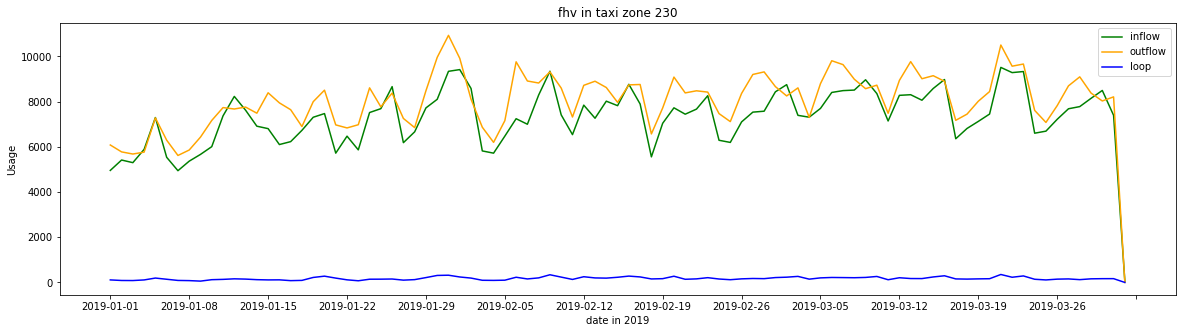

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(fhv_tz230_date.date, fhv_tz230_date.inflow_counts, color='g', label = 'inflow')
ax.plot(fhv_tz230_date.date, fhv_tz230_date.outflow_counts, color='orange', label = 'outflow')
ax.plot(fhv_tz230_date.date, fhv_tz230_date.loop_counts, color='blue', label = 'loop')
ax.legend()
ax.set(xlabel='date in 2019', ylabel='Usage',
       title='fhv in taxi zone 230')
fig.show()

# Night time TLC at Times Square

In [0]:
# daily night sum

In [0]:
fhv_tz230_date_night = fhv_tx230_night.groupby(['date']).sum()
fhv_tz230_date_night.reset_index(inplace=True)

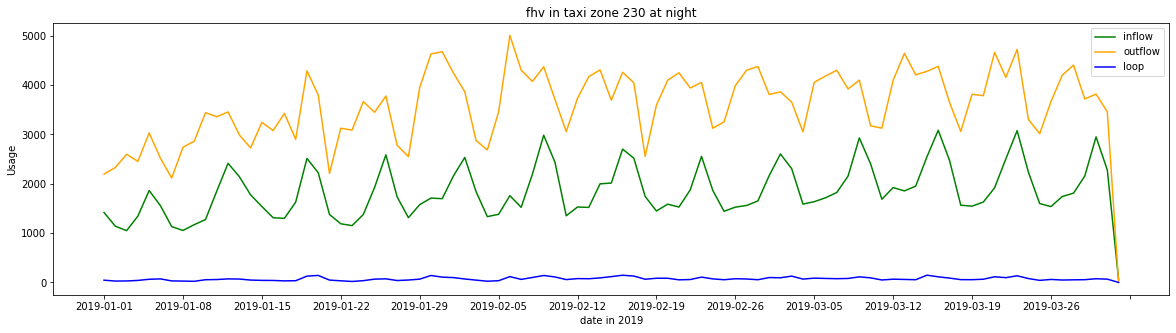

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(fhv_tz230_date_night.date, fhv_tz230_date_night.inflow_counts, color='g', label = 'inflow')
ax.plot(fhv_tz230_date_night.date, fhv_tz230_date_night.outflow_counts, color='orange', label = 'outflow')
ax.plot(fhv_tz230_date_night.date, fhv_tz230_date_night.loop_counts, color='blue', label = 'loop')
ax.legend()
ax.set(xlabel='date in 2019', ylabel='Usage',
       title='fhv in taxi zone 230 at night')
fig.show()

In [0]:
# weekly sum

In [0]:
fhv_tz230_weekly = fhv_tx230.groupby(['week']).sum()
fhv_tz230_weekly.reset_index(inplace=True)

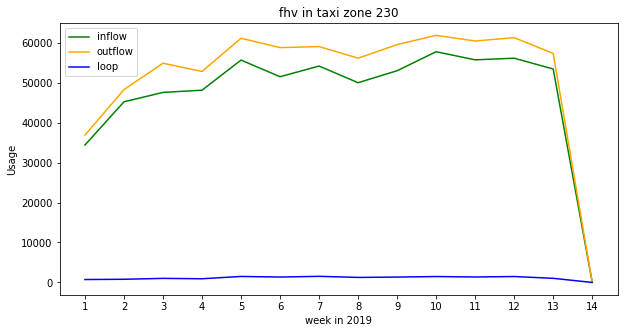

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
myLocator = mticker.MultipleLocator(1)
ax.xaxis.set_major_locator(myLocator)
ax.plot(fhv_tz230_weekly.week, fhv_tz230_weekly.inflow_counts, color='g', label = 'inflow')
ax.plot(fhv_tz230_weekly.week, fhv_tz230_weekly.outflow_counts, color='orange', label = 'outflow')
ax.plot(fhv_tz230_weekly.week, fhv_tz230_weekly.loop_counts, color='blue', label = 'loop')
ax.legend()
ax.set(xlabel='week in 2019', ylabel='Usage',
       title='fhv in taxi zone 230')
fig.show()

In [0]:
# weekly night sum

In [0]:
fhv_tz230_weekly_night = fhv_tx230_night.groupby(['week']).sum()
fhv_tz230_weekly_night.reset_index(inplace=True)

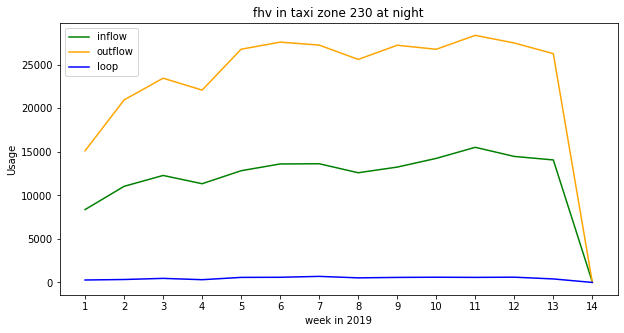

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
myLocator = mticker.MultipleLocator(1)
ax.xaxis.set_major_locator(myLocator)
ax.plot(fhv_tz230_weekly_night.week, fhv_tz230_weekly_night.inflow_counts, color='g', label = 'inflow')
ax.plot(fhv_tz230_weekly_night.week, fhv_tz230_weekly_night.outflow_counts, color='orange', label = 'outflow')
ax.plot(fhv_tz230_weekly_night.week, fhv_tz230_weekly_night.loop_counts, color='blue', label = 'loop')
ax.legend()
ax.set(xlabel='week in 2019', ylabel='Usage',
       title='fhv in taxi zone 230 at night')
fig.show()

In [0]:
# hourly everage

In [0]:
fhv_tz230_hourly = fhv_tx230.groupby(['hour']).mean()
fhv_tz230_hourly.reset_index(inplace=True)

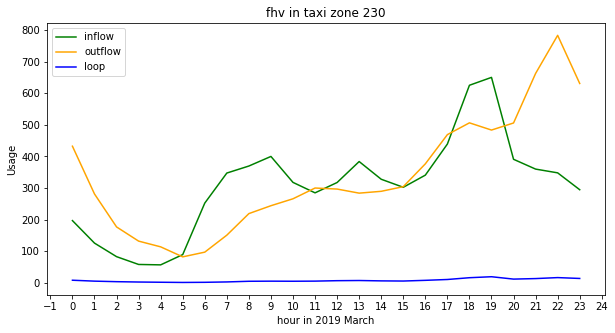

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
myLocator = mticker.MultipleLocator(1)
ax.xaxis.set_major_locator(myLocator)
ax.plot(fhv_tz230_hourly.hour, fhv_tz230_hourly.inflow_counts, color='g', label = 'inflow')
ax.plot(fhv_tz230_hourly.hour, fhv_tz230_hourly.outflow_counts, color='orange', label = 'outflow')
ax.plot(fhv_tz230_hourly.hour, fhv_tz230_hourly.loop_counts, color='blue', label = 'loop')
ax.legend()
ax.set(xlabel='hour in 2019 March', ylabel='Usage',
       title='fhv in taxi zone 230')
fig.show()

# Process MTA data

In [0]:
# MTA

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
MTA = pd.read_csv("drive/My Drive/data/clean_df.csv")

In [0]:
MTA.head()

,Unnamed: 0,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,datetime_clean,year,weekday,group,group_id,station_line,entries_diff,exit_diff,first_row_group,entries_outlier,exit_outlier,week,hour,timegroup,timegroupstr,wkdaynbr
0,16640,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,07:00:00,REGULAR,1157494,1642918,01/11/2020 07:00:00,2020-01-11 07:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,17.0,12.0,False,False,False,2,7,2,4am - 8am,6
1,16641,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,11:00:00,REGULAR,1157563,1642989,01/11/2020 11:00:00,2020-01-11 11:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,69.0,71.0,False,False,False,2,11,3,8am - 12pm,6
2,16642,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,15:00:00,REGULAR,1157637,1643061,01/11/2020 15:00:00,2020-01-11 15:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,74.0,72.0,False,False,False,2,15,4,12pm - 4pm,6
3,16643,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,19:00:00,REGULAR,1157679,1643167,01/11/2020 19:00:00,2020-01-11 19:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,42.0,106.0,False,False,False,2,19,5,4pm - 8pm,6
4,16644,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,23:00:00,REGULAR,1157695,1643229,01/11/2020 23:00:00,2020-01-11 23:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,16.0,62.0,False,False,False,2,23,6,8pm - 12am,6


In [0]:
MTA.shape

(5666069, 29)

In [0]:
MTA2020 = MTA[MTA['year'] == 2020]

In [0]:
MTA2020.shape

(2858583, 29)

In [0]:
MTA2019 = MTA[MTA['year'] == 2019]

In [0]:
MTA2019.shape

(2807486, 29)

# Add Coordinate for MTA data

In [0]:
MTA_taxizone = pd.read_csv("drive/My Drive/sjoined_mta_filtered2.csv")

In [0]:
MTA_taxizone.head()

,Booth,Stop Name,location_id,zone,borough
0,A002,Lexington Av/59 St,237,Upper East Side South,Manhattan
1,A004,Lexington Av/59 St,237,Upper East Side South,Manhattan
2,N601,Lexington Av/63 St,237,Upper East Side South,Manhattan
3,R244,59 St,237,Upper East Side South,Manhattan
4,R244A,59 St,237,Upper East Side South,Manhattan


In [0]:
turns_loc_2019 = pd.merge(MTA2019, MTA_taxizone, how='inner',left_on='c/a',right_on='Booth')
turns_loc_2019.head()

,Unnamed: 0,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,datetime_clean,year,weekday,group,group_id,station_line,entries_diff,exit_diff,first_row_group,entries_outlier,exit_outlier,week,hour,timegroup,timegroupstr,wkdaynbr,Booth,Stop Name,location_id,zone,borough
0,94776,N501,R020,01-00-00,47-50 STS ROCK,BDFM,IND,01/12/2019,07:00:00,REGULAR,6599715,8986151,01/12/2019 07:00:00,2019-01-12 07:00:00,2019,Saturday,N501R02001-00-0047-50 STS ROCKBDFMIND2019,5,47-50 STS ROCKBDFM,11.0,67.0,False,False,False,2,7,2,4am - 8am,6,N501,47-50 Sts - Rockefeller Ctr,230,Times Sq/Theatre District,Manhattan
1,94777,N501,R020,01-00-00,47-50 STS ROCK,BDFM,IND,01/12/2019,11:00:00,REGULAR,6599740,8986361,01/12/2019 11:00:00,2019-01-12 11:00:00,2019,Saturday,N501R02001-00-0047-50 STS ROCKBDFMIND2019,5,47-50 STS ROCKBDFM,25.0,210.0,False,False,False,2,11,3,8am - 12pm,6,N501,47-50 Sts - Rockefeller Ctr,230,Times Sq/Theatre District,Manhattan
2,94778,N501,R020,01-00-00,47-50 STS ROCK,BDFM,IND,01/12/2019,15:00:00,REGULAR,6599806,8986557,01/12/2019 15:00:00,2019-01-12 15:00:00,2019,Saturday,N501R02001-00-0047-50 STS ROCKBDFMIND2019,5,47-50 STS ROCKBDFM,66.0,196.0,False,False,False,2,15,4,12pm - 4pm,6,N501,47-50 Sts - Rockefeller Ctr,230,Times Sq/Theatre District,Manhattan
3,94779,N501,R020,01-00-00,47-50 STS ROCK,BDFM,IND,01/12/2019,19:00:00,REGULAR,6599973,8986790,01/12/2019 19:00:00,2019-01-12 19:00:00,2019,Saturday,N501R02001-00-0047-50 STS ROCKBDFMIND2019,5,47-50 STS ROCKBDFM,167.0,233.0,False,False,False,2,19,5,4pm - 8pm,6,N501,47-50 Sts - Rockefeller Ctr,230,Times Sq/Theatre District,Manhattan
4,94780,N501,R020,01-00-00,47-50 STS ROCK,BDFM,IND,01/12/2019,23:00:00,REGULAR,6600095,8986842,01/12/2019 23:00:00,2019-01-12 23:00:00,2019,Saturday,N501R02001-00-0047-50 STS ROCKBDFMIND2019,5,47-50 STS ROCKBDFM,122.0,52.0,False,False,False,2,23,6,8pm - 12am,6,N501,47-50 Sts - Rockefeller Ctr,230,Times Sq/Theatre District,Manhattan


In [0]:
turns_loc_2019.to_csv('turns_loc_2019.csv')

MessageError: ignored

In [0]:
turns_loc_2020 = pd.merge(MTA2020, MTA_taxizone, how='inner',left_on='c/a',right_on='Booth')
turns_loc_2020.head()

,Unnamed: 0,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,datetime_clean,year,weekday,group,group_id,station_line,entries_diff,exit_diff,first_row_group,entries_outlier,exit_outlier,week,hour,timegroup,timegroupstr,wkdaynbr,Booth,Stop Name,location_id,zone,borough
0,16640,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,07:00:00,REGULAR,1157494,1642918,01/11/2020 07:00:00,2020-01-11 07:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,17.0,12.0,False,False,False,2,7,2,4am - 8am,6,B022,Avenue M,165,Midwood,Brooklyn
1,16641,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,11:00:00,REGULAR,1157563,1642989,01/11/2020 11:00:00,2020-01-11 11:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,69.0,71.0,False,False,False,2,11,3,8am - 12pm,6,B022,Avenue M,165,Midwood,Brooklyn
2,16642,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,15:00:00,REGULAR,1157637,1643061,01/11/2020 15:00:00,2020-01-11 15:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,74.0,72.0,False,False,False,2,15,4,12pm - 4pm,6,B022,Avenue M,165,Midwood,Brooklyn
3,16643,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,19:00:00,REGULAR,1157679,1643167,01/11/2020 19:00:00,2020-01-11 19:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,42.0,106.0,False,False,False,2,19,5,4pm - 8pm,6,B022,Avenue M,165,Midwood,Brooklyn
4,16644,B022,R229,00-00-00,AVENUE M,BQ,BMT,01/11/2020,23:00:00,REGULAR,1157695,1643229,01/11/2020 23:00:00,2020-01-11 23:00:00,2020,Saturday,B022R22900-00-00AVENUE MBQBMT2020,0,AVENUE MBQ,16.0,62.0,False,False,False,2,23,6,8pm - 12am,6,B022,Avenue M,165,Midwood,Brooklyn


In [0]:
turns_loc_2020.to_csv('turns_loc_2020.csv') 

In [0]:
turns_loc_2019[turns_loc_2019['location_id'] == 230].station_line.unique()

array(['47-50 STS ROCKBDFM', '49 STNQRW', '50 ST1',
       '42 ST-PORT AUTHACENGRS1237W', '42 ST-PORT AUTHACENQRS1237W',
       '7 AVBDE'], dtype=object)

In [0]:
stations_date_byzone = turns_loc_2019.groupby(['location_id', 'date']).sum()
stations_date_byzone.reset_index(inplace=True)

In [0]:
stations_date_byzone.to_csv('stations_date_byzone_19.csv') 

In [0]:
zone230_date_2019 = stations_date_byzone[stations_date_byzone['location_id'] == 230][['date','entries_diff','exit_diff']]

# Day time MTA at Times Square in 2019

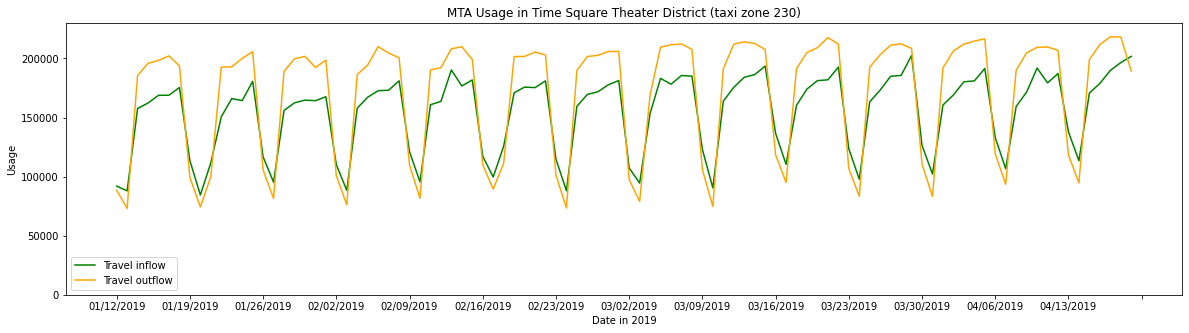

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(zone230_date_2019.date, zone230_date_2019.entries_diff, color='g', label = 'Travel inflow')
ax.plot(zone230_date_2019.date, zone230_date_2019.exit_diff, color='orange', label = 'Travel outflow')
plt.ylim([0,230000])
ax.legend()
ax.set(xlabel='Date in 2019', ylabel='Usage',
       title='MTA Usage in Time Square Theater District (taxi zone 230)')
fig.show()

In [0]:
# at night

In [0]:
turns_loc_2019_night = turns_loc_2019[turns_loc_2019['timegroup'].isin([6,1])]

In [0]:
stations_date_byzone_2019_night = turns_loc_2019_night.groupby(['location_id', 'date']).sum()
stations_date_byzone_2019_night.reset_index(inplace=True)
zone230_date_2019_night = stations_date_byzone_2019_night[stations_date_byzone_2019_night['location_id'] == 230][['date','entries_diff','exit_diff']]

In [0]:
stations_date_byzone_2019_night.to_csv('stations_date_byzone_2019_night.csv')

# Night time MTA at Times Square in 2019

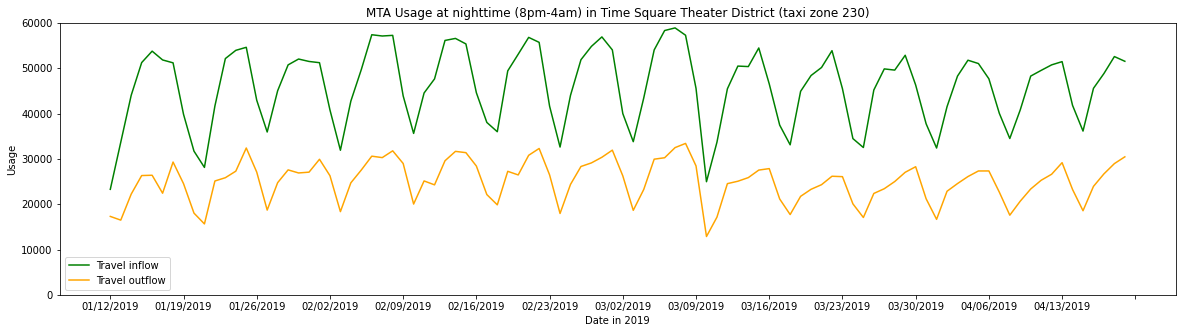

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(zone230_date_2019_night.date, zone230_date_2019_night.entries_diff, color='g', label = 'Travel inflow')
ax.plot(zone230_date_2019_night.date, zone230_date_2019_night.exit_diff, color='orange', label = 'Travel outflow')
plt.ylim([0,60000])
ax.legend()
ax.set(xlabel='Date in 2019', ylabel='Usage',
       title='MTA Usage at nighttime (8pm-4am) in Time Square Theater District (taxi zone 230)')
fig.show()

In [0]:
stations_date_byzone_2020 = turns_loc_2020.groupby(['location_id', 'date']).sum()
stations_date_byzone_2020.reset_index(inplace=True)
zone230_date_2020 = stations_date_byzone_2020[stations_date_byzone_2020['location_id'] == 230][['date','entries_diff','exit_diff']]

In [0]:
# at night

In [0]:
turns_loc_2020_night = turns_loc_2020[turns_loc_2020['timegroup'].isin([6,1])]

In [0]:
stations_date_byzone_2020_night = turns_loc_2020_night.groupby(['location_id', 'date']).sum()
stations_date_byzone_2020_night.reset_index(inplace=True)
zone230_date_2020_night = stations_date_byzone_2020_night[stations_date_byzone_2020_night['location_id'] == 230][['date','entries_diff','exit_diff']]

In [0]:
stations_date_byzone_2020.to_csv('stations_date_byzone_2020.csv')
stations_date_byzone_2020_night.to_csv('stations_date_byzone_2020_night.csv')

# Day time MTA at Times Square in 2020

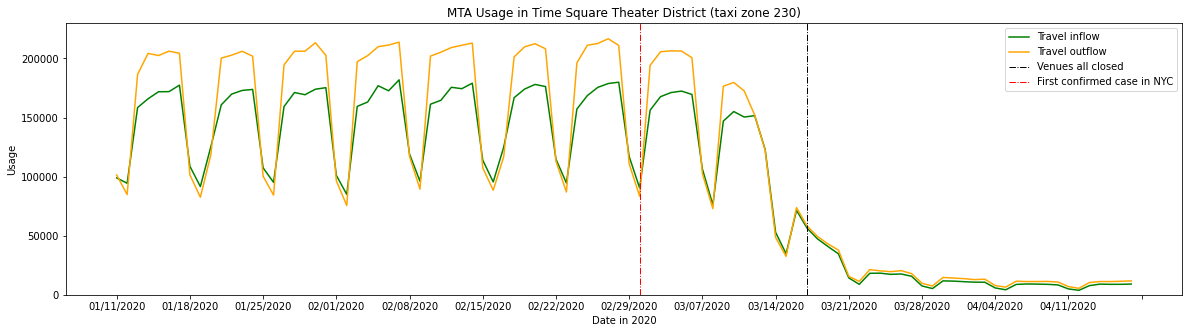

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(zone230_date_2020.date, zone230_date_2020.entries_diff, color='g', label = 'Travel inflow')
ax.plot(zone230_date_2020.date, zone230_date_2020.exit_diff, color='orange', label = 'Travel outflow')
plt.axvline(x='03/17/2020', linewidth = 1, ls = '-.', label='Venues all closed', c= 'black')
plt.axvline(x='03/01/2020', linewidth = 1, ls = '-.', label='First confirmed case in NYC', c= 'red')
plt.ylim([0,230000])
ax.legend()
ax.set(xlabel='Date in 2020', ylabel='Usage',
       title='MTA Usage in Time Square Theater District (taxi zone 230)')
fig.show()

# Night time MTA at Times Square in 2020

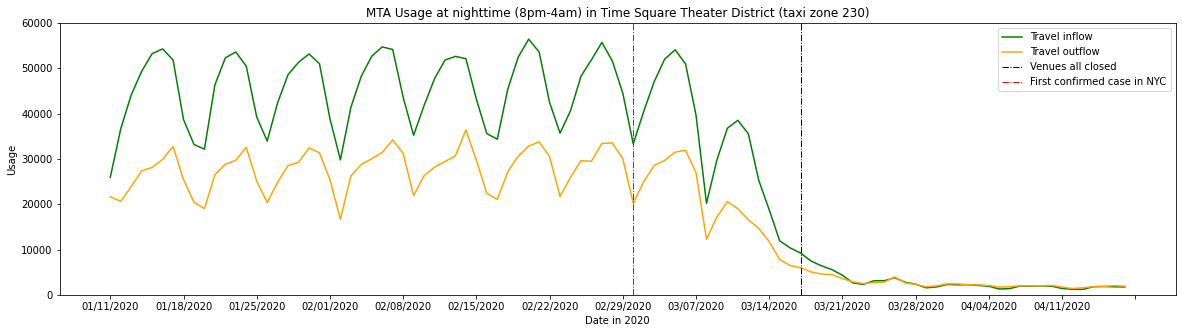

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(zone230_date_2020_night.date, zone230_date_2020_night.entries_diff, color='g', label = 'Travel inflow')
ax.plot(zone230_date_2020_night.date, zone230_date_2020_night.exit_diff, color='orange', label = 'Travel outflow')
plt.axvline(x='03/17/2020', linewidth = 1, ls = '-.', label='Venues all closed', c= 'black')
plt.axvline(x='03/01/2020', linewidth = 1, ls = '-.', label='First confirmed case in NYC', c= 'red')
plt.ylim([0,60000])
ax.legend()
ax.set(xlabel='Date in 2020', ylabel='Usage',
       title='MTA Usage at nighttime (8pm-4am) in Time Square Theater District (taxi zone 230)')
fig.show()

# Process Citibike

In [0]:
# Citibike

In [0]:
citibike_2001 = pd.read_csv('https://s3.amazonaws.com/tripdata/202001-citibike-tripdata.csv.zip')

In [0]:
citibike_2002 = pd.read_csv('https://s3.amazonaws.com/tripdata/202002-citibike-tripdata.csv.zip')
citibike_2003 = pd.read_csv('https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv.zip')

In [0]:
citibike_20 = pd.concat([citibike_2001,citibike_2002,citibike_2003])

In [0]:
citibike_20.shape

(3455883, 15)

In [0]:
citibike_20.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1068452,137,2020-03-31 23:56:06.0490,2020-03-31 23:58:23.3880,422,W 59 St & 10 Ave,40.770513,-73.988038,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,18851,Subscriber,1989,2
1068453,1548,2020-03-31 23:57:27.6850,2020-04-01 00:23:16.4110,523,W 38 St & 8 Ave,40.754666,-73.991382,442,W 27 St & 7 Ave,40.746647,-73.993915,36539,Subscriber,1993,1
1068454,308,2020-03-31 23:58:00.2690,2020-04-01 00:03:08.9500,528,2 Ave & E 31 St,40.742909,-73.977061,487,E 20 St & FDR Drive,40.733143,-73.975739,43023,Subscriber,1982,1
1068455,872,2020-03-31 23:58:42.9010,2020-04-01 00:13:15.5860,3043,Lewis Ave & Decatur St,40.681460,-73.934903,3755,DeKalb Ave & Franklin Ave,40.690648,-73.957462,43073,Customer,1990,1
1068456,306,2020-03-31 23:59:17.2580,2020-04-01 00:04:23.8880,3721,31 St & Newtown Ave,40.767549,-73.920933,3592,Crescent St & Broadway,40.763359,-73.928647,39373,Subscriber,1974,1


In [0]:
citibike_20_clean = citibike_20[citibike_20['tripduration'] <= 24*60*60*1]#remove trip over 1 day and less than 1 min
citibike_20_clean= citibike_20_clean[citibike_20_clean['tripduration'] >= 60]

In [0]:
citibike_20_clean.shape

(3454940, 15)

In [0]:
citibike_taxizone = pd.read_csv("drive/My Drive/sjoined_citibike.csv", index_col=0)

In [0]:
citibike_taxizone.head()

,stationName,AvailableDocks,totalDocks,latitude,longitude,StatusValue,StatusKey,availableBikes,Address,lastCommunicationTime,State,geometry,index_right,shape_area,objectid,shape_leng,location_id,zone,borough,venue_counts
Id,,,,,,,,,,,,,,,,,,,,
281,Grand Army Plaza & Central Park S,47,66,40.764397,-73.973715,In Service,1,19,Grand Army Plaza & Central Park S,11/18/19 14:21,NY,POINT (-73.97371465000001 40.7643971),162,0.000041,163,0.034177,163,Midtown North,Manhattan,5.0
468,Broadway & W 56 St,11,65,40.765265,-73.981923,In Service,1,53,Broadway & W 56 St,11/18/19 14:23,NY,POINT (-73.98192338 40.7652654),162,0.000041,163,0.034177,163,Midtown North,Manhattan,5.0
3457,E 58 St & Madison Ave,0,46,40.763026,-73.972095,In Service,1,45,E 58 St & Madison Ave,11/18/19 14:24,NY,POINT (-73.97209525 40.76302594),162,0.000041,163,0.034177,163,Midtown North,Manhattan,5.0
3724,7 Ave & Central Park South,4,39,40.766741,-73.979069,In Service,1,35,7 Ave & Central Park South,11/18/19 14:24,NY,POINT (-73.97906899 40.76674056),162,0.000041,163,0.034177,163,Midtown North,Manhattan,5.0
3809,W 55 St & 6 Ave,9,53,40.763189,-73.978434,In Service,1,40,W 55 St & 6 Ave,11/18/19 14:24,NY,POINT (-73.97843399999999 40.763189),162,0.000041,163,0.034177,163,Midtown North,Manhattan,5.0


In [0]:
citibike_taxizone.shape

(860, 20)

In [0]:
citibike_dic ={key:citibike_taxizone['location_id'][key] for key in citibike_taxizone.index}

In [0]:
citibike_20_clean['start_station_tx']=citibike_20_clean['start station id'].map(citibike_dic)

In [0]:
citibike_20_clean['end_station_tx']=citibike_20_clean['end station id'].map(citibike_dic)

In [0]:
citibike_20_clean.shape

(3454940, 17)

In [0]:
citibike_20_clean.to_csv('citibike_20_3.csv')

In [0]:
with open('drive/My Drive/citibike_20_2.csv','r')as fi:
    reader = csv.DictReader(fi)
    for record in reader:
      print(record)
      break

OrderedDict([('', '0'), ('tripduration', '789'), ('starttime', '2020-01-01 00:00:55.3900'), ('stoptime', '2020-01-01 00:14:05.1470'), ('start station id', '504'), ('start station name', '1 Ave & E 16 St'), ('start station latitude', '40.73221853'), ('start station longitude', '-73.98165557'), ('end station id', '307'), ('end station name', 'Canal St & Rutgers St'), ('end station latitude', '40.71427487'), ('end station longitude', '-73.98990025'), ('bikeid', '30326'), ('usertype', 'Subscriber'), ('birth year', '1992'), ('gender', '1'), ('start_station_tx', '224.0'), ('end_station_tx', '232.0')])


In [0]:
taxizone_230_citi_inflow_20 = {}
taxizone_230_citi_outflow_20 = {}
taxizone_230_citi_loop_20 = {}

taxizone_148_citi_inflow_20 = {}
taxizone_148_citi_outflow_20 = {}
taxizone_148_citi_loop_20 = {}

with open('drive/My Drive/citibike_20_3.csv','r')as fi:
    reader = csv.DictReader(fi)
    for record in reader:
        date_hour_end = record['stoptime'][:13]
        date_hour_start = record['starttime'][:13]
        if record['end_station_tx'] == '230.0' and record['start_station_tx'] != '230.0':
            taxizone_230_citi_inflow_20[date_hour_end]=taxizone_230_citi_inflow_20.get(date_hour_end,0)+1
        elif record['end_station_tx'] != '230.0' and record['start_station_tx'] == '230.0':
            taxizone_230_citi_outflow_20[date_hour_start]=taxizone_230_citi_outflow_20.get(date_hour_start,0)+1
        elif record['end_station_tx'] == '230.0' and record['start_station_tx'] == '230.0':
            taxizone_230_citi_loop_20[date_hour_end]=taxizone_230_citi_loop_20.get(date_hour_end,0)+1
        elif record['end_station_tx'] == '148.0' and record['start_station_tx'] != '148.0':
            taxizone_148_citi_inflow_20[date_hour_end]=taxizone_148_citi_inflow_20.get(date_hour_end,0)+1
        elif record['end_station_tx'] != '148.0' and record['start_station_tx'] == '148.0':
            taxizone_148_citi_outflow_20[date_hour_start]=taxizone_148_citi_outflow_20.get(date_hour_start,0)+1
        elif record['end_station_tx'] == '148.0' and record['start_station_tx'] == '148.0':
            taxizone_148_citi_loop_20[date_hour_end]=taxizone_148_citi_loop_20.get(date_hour_end,0)+1

In [0]:
sorted(taxizone_230_citi_inflow_20.keys())[-1]

'2020-03-31 23'

In [0]:
import datetime

dt = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 4, 1, 1, 0, 0)
step = datetime.timedelta(hours=1)

result = []
fulldate = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H'))
    fulldate.append(dt.strftime('%m/%d/%Y %H:%M:%S'))
    dt += step

In [0]:
import datetime
import dateutil
from datetime import datetime, timedelta, time, date

citi20 = pd.DataFrame({'map' : result, 'time' : fulldate})
citi20['time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in citi20['time']]

In [0]:
citi20['hour'] = [x.hour for x in citi20['time']]
citi20['weekday'] = citi20[['time']].apply(lambda x: datetime.strftime(x['time'], '%A'), axis=1)
citi20['week'] = [x.isocalendar()[1] for x in citi20['time']]

In [0]:
def timebin(hour):
    if hour == 20:
        return 1
    if hour == 21:
        return 1
    if hour == 22:
        return 1
    if hour == 23:
        return 1
    if hour == 0:
        return 2
    if hour == 1:
        return 2
    if hour == 2:
        return 2
    if hour == 3:
        return 2
    else:
        return 0
    
hourgroups = {1:'8pm - 12am', 
              2: '12am - 4am', 
              0:'daytime'}

In [0]:
citi20['timegroup'] = citi20['hour'].apply(timebin)
citi20['timegroupstr'] = citi20['timegroup'].map(hourgroups)
citi20['date'] = [x[:10] for x in citi20['map']]

In [0]:
citi20['inflow_counts'] = citi20.map.map(taxizone_230_citi_inflow_20)
citi20['outflow_counts'] = citi20.map.map(taxizone_230_citi_outflow_20)
citi20['loop_counts'] = citi20.map.map(taxizone_230_citi_loop_20)

In [0]:
citi20_tx230 = citi20.fillna(0)

In [0]:
citi20_tx230.head()

,map,time,hour,weekday,week,timegroup,timegroupstr,date,inflow_counts,outflow_counts,loop_counts
0,2020-01-01 00,2020-01-01 00:00:00,0,Wednesday,1,2,12am - 4am,2020-01-01,0.0,0.0,0.0
1,2020-01-01 01,2020-01-01 01:00:00,1,Wednesday,1,2,12am - 4am,2020-01-01,0.0,0.0,0.0
2,2020-01-01 02,2020-01-01 02:00:00,2,Wednesday,1,2,12am - 4am,2020-01-01,0.0,0.0,0.0
3,2020-01-01 03,2020-01-01 03:00:00,3,Wednesday,1,2,12am - 4am,2020-01-01,0.0,0.0,0.0
4,2020-01-01 04,2020-01-01 04:00:00,4,Wednesday,1,0,daytime,2020-01-01,0.0,0.0,0.0


In [0]:
from google.colab import files
citi20_tx230.to_csv('citi20_tx230.csv') 
files.download('citi20_tx230.csv')

In [0]:
# filter by nighttimes

In [0]:
citi20_tx230_night = citi20_tx230[citi20_tx230['timegroup'].isin([1,2])]

In [0]:
# daily sum

In [0]:
citi20_tx230_date = citi20_tx230.groupby(['date']).sum()
citi20_tx230_date.reset_index(inplace=True)

# Day time Citibike at Times Square in 2020

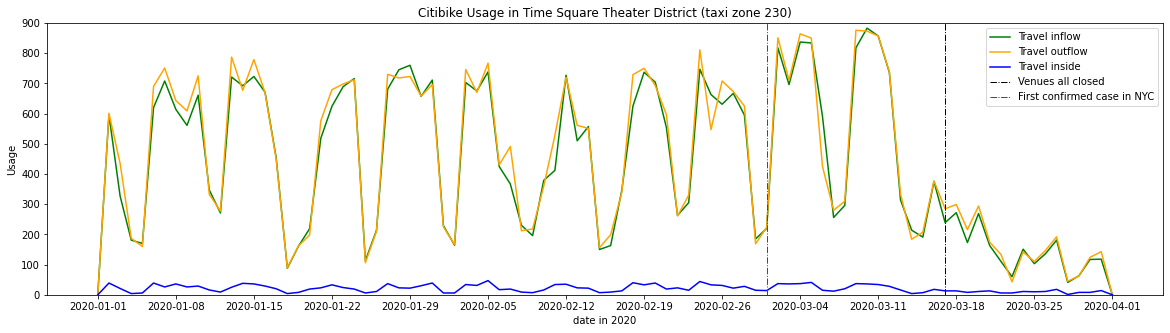

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(citi20_tx230_date.date, citi20_tx230_date.inflow_counts, color='g', label = 'Travel inflow')
ax.plot(citi20_tx230_date.date, citi20_tx230_date.outflow_counts, color='orange', label = 'Travel outflow')
ax.plot(citi20_tx230_date.date, citi20_tx230_date.loop_counts, color='blue', label = 'Travel inside')
plt.axvline(x='2020-03-17', linewidth = 1, ls = '-.', label='Venues all closed', c= 'black')
plt.axvline(x='2020-03-01', linewidth = 1, ls = '-.', label='First confirmed case in NYC', c= 'red')
plt.ylim([0,900])
ax.legend()
ax.set(xlabel='date in 2020', ylabel='Usage',
       title='Citibike Usage in Time Square Theater District (taxi zone 230)')
fig.show()

In [0]:
# daily night sum

In [0]:
citi20_tx230_night_date = citi20_tx230_night.groupby(['date']).sum()
citi20_tx230_night_date.reset_index(inplace=True)

# Night time Citibike at Times Square in 2020

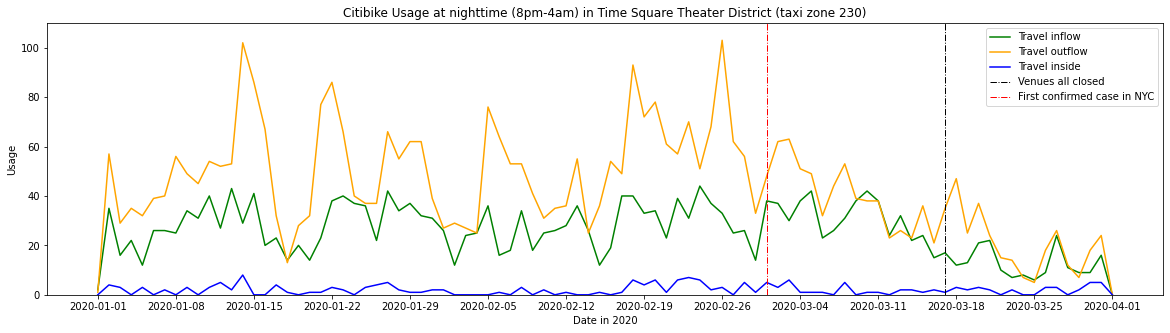

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(citi20_tx230_night_date.date, citi20_tx230_night_date.inflow_counts, color='g', label = 'Travel inflow')
ax.plot(citi20_tx230_night_date.date, citi20_tx230_night_date.outflow_counts, color='orange', label = 'Travel outflow')
ax.plot(citi20_tx230_night_date.date, citi20_tx230_night_date.loop_counts, color='blue', label = 'Travel inside')
plt.axvline(x='2020-03-17', linewidth = 1, ls = '-.', label='Venues all closed', c= 'black')
plt.axvline(x='2020-03-01', linewidth = 1, ls = '-.', label='First confirmed case in NYC', c= 'red')
plt.ylim([0,110])
ax.legend()
ax.set(xlabel='Date in 2020', ylabel='Usage',
       title='Citibike Usage at nighttime (8pm-4am) in Time Square Theater District (taxi zone 230)')
fig.show()

In [0]:
# citibike 19

In [0]:
citibike_1901 = pd.read_csv('https://s3.amazonaws.com/tripdata/201901-citibike-tripdata.csv.zip')
#citibike_1902 = pd.read_csv('https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip')
citibike_1903 = pd.read_csv('https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip')

In [0]:
citibike_1902 = pd.read_csv('drive/My Drive/201902-citibike-tripdata.csv')

In [0]:
citibike_19 = pd.concat([citibike_1901,citibike_1902,citibike_1903])

In [0]:
citibike_19.shape

(3238991, 15)

In [0]:
citibike_19_clean = citibike_19[citibike_19['tripduration'] <= 24*60*60*1]#remove trip over 1 day and less than 1 min
citibike_19_clean= citibike_19_clean[citibike_19_clean['tripduration'] >= 60]

In [0]:
citibike_19_clean['start_station_tx']=citibike_19_clean['start station id'].map(citibike_dic)
citibike_19_clean['end_station_tx']=citibike_19_clean['end station id'].map(citibike_dic)

In [0]:
citibike_19_clean.to_csv('citibike_19.csv')

In [0]:
taxizone_230_citi_inflow_19 = {}
taxizone_230_citi_outflow_19 = {}
taxizone_230_citi_loop_19 = {}

taxizone_148_citi_inflow_19 = {}
taxizone_148_citi_outflow_19 = {}
taxizone_148_citi_loop_19 = {}

with open('drive/My Drive/citibike_19.csv','r')as fi:
    reader = csv.DictReader(fi)
    for record in reader:
        date_hour_end = record['stoptime'][:13]
        date_hour_start = record['starttime'][:13]
        if record['end_station_tx'] == '230.0' and record['start_station_tx'] != '230.0':
            taxizone_230_citi_inflow_19[date_hour_end]=taxizone_230_citi_inflow_19.get(date_hour_end,0)+1
        elif record['end_station_tx'] != '230.0' and record['start_station_tx'] == '230.0':
            taxizone_230_citi_outflow_19[date_hour_start]=taxizone_230_citi_outflow_19.get(date_hour_start,0)+1
        elif record['end_station_tx'] == '230.0' and record['start_station_tx'] == '230.0':
            taxizone_230_citi_loop_19[date_hour_end]=taxizone_230_citi_loop_19.get(date_hour_end,0)+1
        elif record['end_station_tx'] == '148.0' and record['start_station_tx'] != '148.0':
            taxizone_148_citi_inflow_19[date_hour_end]=taxizone_148_citi_inflow_19.get(date_hour_end,0)+1
        elif record['end_station_tx'] != '148.0' and record['start_station_tx'] == '148.0':
            taxizone_148_citi_outflow_19[date_hour_start]=taxizone_148_citi_outflow_19.get(date_hour_start,0)+1
        elif record['end_station_tx'] == '148.0' and record['start_station_tx'] == '148.0':
            taxizone_148_citi_loop_19[date_hour_end]=taxizone_148_citi_loop_19.get(date_hour_end,0)+1

In [0]:
import datetime

dt = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 4, 1, 1, 0, 0)
step = datetime.timedelta(hours=1)

result = []
fulldate = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H'))
    fulldate.append(dt.strftime('%m/%d/%Y %H:%M:%S'))
    dt += step

In [0]:
import datetime
import dateutil
from datetime import datetime, timedelta, time, date

citi19 = pd.DataFrame({'map' : result, 'time' : fulldate})
citi19['time'] = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in citi19['time']]

In [0]:
citi19['hour'] = [x.hour for x in citi19['time']]
citi19['weekday'] = citi19[['time']].apply(lambda x: datetime.strftime(x['time'], '%A'), axis=1)
citi19['week'] = [x.isocalendar()[1] for x in citi19['time']]

In [0]:
citi19['timegroup'] = citi19['hour'].apply(timebin)
citi19['timegroupstr'] = citi19['timegroup'].map(hourgroups)
citi19['date'] = [x[:10] for x in citi19['map']]

In [0]:
citi19['inflow_counts'] = citi19.map.map(taxizone_230_citi_inflow_19)
citi19['outflow_counts'] = citi19.map.map(taxizone_230_citi_outflow_19)
citi19['loop_counts'] = citi19.map.map(taxizone_230_citi_loop_19)

In [0]:
citi19_tx230 = citi19.fillna(0)

In [0]:
from google.colab import files
citi19_tx230.to_csv('citi19_tx230.csv') 
files.download('citi19_tx230.csv')

In [0]:
citi19_tx230_night = citi19_tx230[citi19_tx230['timegroup'].isin([1,2])]

In [0]:
citi19_tx230_date = citi19_tx230.groupby(['date']).sum()
citi19_tx230_date.reset_index(inplace=True)

# Day time Citibike at Times Square in 2019

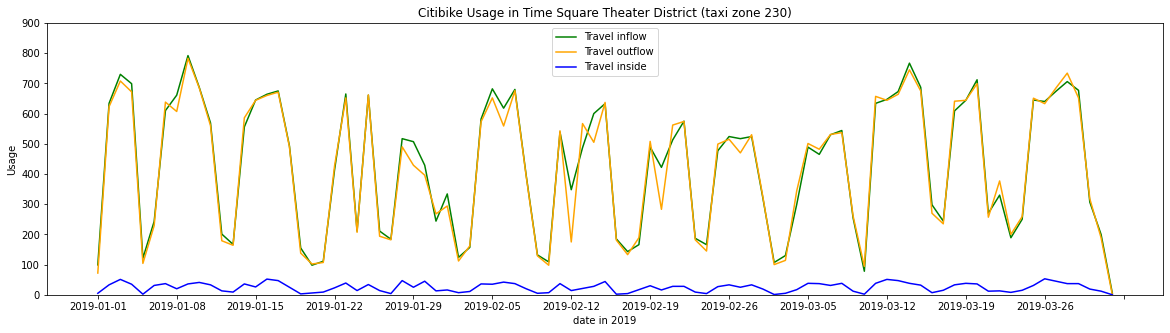

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(citi19_tx230_date.date, citi19_tx230_date.inflow_counts, color='g', label = 'Travel inflow')
ax.plot(citi19_tx230_date.date, citi19_tx230_date.outflow_counts, color='orange', label = 'Travel outflow')
ax.plot(citi19_tx230_date.date, citi19_tx230_date.loop_counts, color='blue', label = 'Travel inside')
plt.ylim([0,900])
ax.legend()
ax.set(xlabel='date in 2019', ylabel='Usage',
       title='Citibike Usage in Time Square Theater District (taxi zone 230)')
fig.show()

In [0]:
citi19_tx230_night_date = citi19_tx230_night.groupby(['date']).sum()
citi19_tx230_night_date.reset_index(inplace=True)

# Night time Citibike at Times Square in 2019

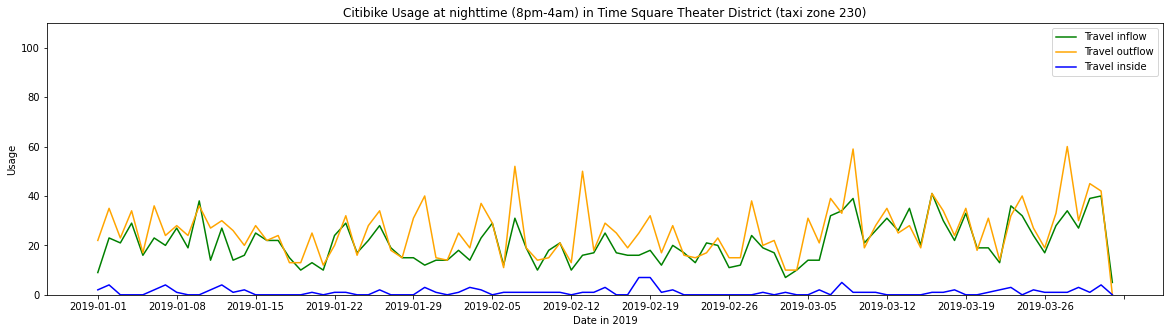

In [0]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(20,5))
myLocator = mticker.MultipleLocator(7)
ax.xaxis.set_major_locator(myLocator)
ax.plot(citi19_tx230_night_date.date, citi19_tx230_night_date.inflow_counts, color='g', label = 'Travel inflow')
ax.plot(citi19_tx230_night_date.date, citi19_tx230_night_date.outflow_counts, color='orange', label = 'Travel outflow')
ax.plot(citi19_tx230_night_date.date, citi19_tx230_night_date.loop_counts, color='blue', label = 'Travel inside')
plt.ylim([0,110])
ax.legend()
ax.set(xlabel='Date in 2019', ylabel='Usage',
       title='Citibike Usage at nighttime (8pm-4am) in Time Square Theater District (taxi zone 230)')
fig.show()